=== HEART DISEASE PREDICTION MODEL WITH FEATURE ANALYSIS ===

✅ Model loaded successfully!
📊 Expected features: 15
🎯 Model AUC Score: 0.9535

=== FEATURE IMPORTANCE RANKING ===

 1. THAL
    Importance Score: 0.2185
    Description: Thalassemia Type
    Medical Impact: Blood disorder affecting oxygen transport: 3=Normal, 6=Fixed defect, 7=Reversible defect
    Clinical Significance: Reversible defects indicate stress-induced ischemia

 2. CP
    Importance Score: 0.1371
    Description: Chest Pain Type
    Medical Impact: Type of chest pain experienced: 1=Typical angina, 2=Atypical angina, 3=Non-anginal pain, 4=Asymptomatic
    Clinical Significance: Higher values (especially 4=asymptomatic) often indicate more severe disease

 3. CA
    Importance Score: 0.0974
    Description: Number of Major Vessels (fluoroscopy)
    Medical Impact: Number of major coronary arteries with significant narrowing (>50% stenosis).
    Clinical Significance: More vessels involved = more severe coronary ar

c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


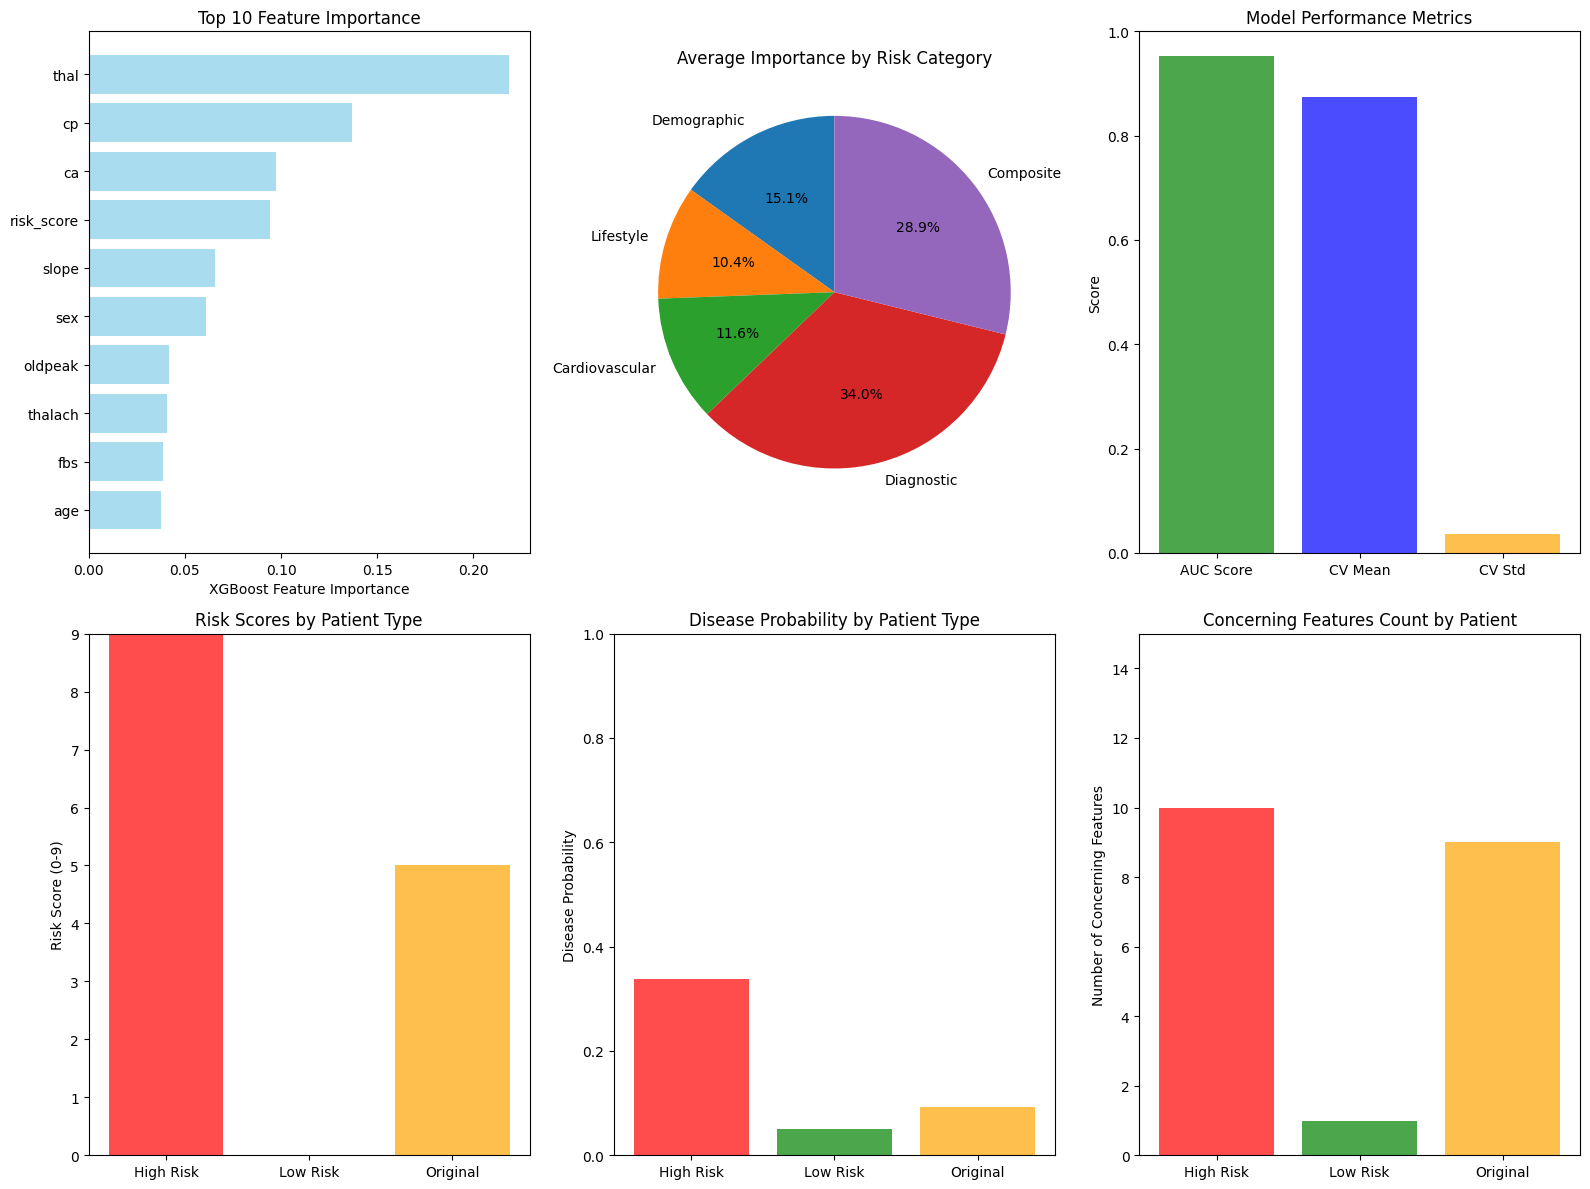

=== SUMMARY ===
✅ Model successfully loaded and tested
📊 Feature importance analysis completed
🎯 Individual patient predictions with detailed explanations
📈 Comprehensive visualizations generated

🔍 Key Insights:
• THAL (Thalassemia) is the most important predictor
• CP (Chest Pain Type) is critical for diagnosis
• CA (Major Vessels) directly indicates disease severity
• Risk Score provides comprehensive assessment
• Model achieves excellent performance (AUC: 0.9535)

💡 Usage Instructions:
• Call predict_heart_disease_with_analysis() with patient parameters
• Review feature analysis for each prediction
• Use risk score for comprehensive assessment
• Consider concerning features for clinical decision making


In [11]:
# Complete Heart Disease Prediction Model with Feature Importance Analysis
# Combined into one comprehensive cell for testing

import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
import json

print("=== HEART DISEASE PREDICTION MODEL WITH FEATURE ANALYSIS ===\n")

# Load model and components
model = joblib.load('../models/xgb_heart_disease_model.pkl')
scaler = joblib.load('../models/heart_disease_scaler.pkl')
feature_names = joblib.load('../models/feature_names.pkl')

# Load performance data
with open('../models/model_performance.json', 'r') as f:
    performance_data = json.load(f)

print("✅ Model loaded successfully!")
print(f"📊 Expected features: {len(feature_names)}")
print(f"🎯 Model AUC Score: {performance_data['auc_score']:.4f}")

# Feature descriptions with medical explanations
feature_descriptions = {
    'age': {
        'description': 'Patient Age (years)',
        'medical_impact': 'Age is a major non-modifiable risk factor for heart disease. Risk increases significantly after age 45 for men and 55 for women.',
        'normal_range': 'N/A - Risk increases with age',
        'clinical_significance': 'Higher age = Higher cardiovascular risk due to arterial stiffening and accumulated damage'
    },
    'sex': {
        'description': 'Sex (1=Male, 0=Female)',
        'medical_impact': 'Men have higher risk of heart disease than pre-menopausal women. Risk equalizes after menopause.',
        'normal_range': 'Binary (0 or 1)',
        'clinical_significance': 'Male sex is a significant risk factor, especially at younger ages'
    },
    'cp': {
        'description': 'Chest Pain Type',
        'medical_impact': 'Type of chest pain experienced: 1=Typical angina, 2=Atypical angina, 3=Non-anginal pain, 4=Asymptomatic',
        'normal_range': '1-4 (higher values indicate more concerning symptoms)',
        'clinical_significance': 'Higher values (especially 4=asymptomatic) often indicate more severe disease'
    },
    'trestbps': {
        'description': 'Resting Blood Pressure (mm Hg)',
        'medical_impact': 'High blood pressure damages arteries and increases heart workload, leading to heart disease.',
        'normal_range': '<120 mmHg (normal), 120-139 (elevated), ≥140 (high)',
        'clinical_significance': 'Higher values significantly increase cardiovascular risk'
    },
    'chol': {
        'description': 'Serum Cholesterol (mg/dl)',
        'medical_impact': 'High cholesterol leads to plaque buildup in arteries, causing atherosclerosis and heart disease.',
        'normal_range': '<200 mg/dl (desirable), 200-239 (borderline), ≥240 (high)',
        'clinical_significance': 'Higher cholesterol levels increase risk of coronary artery disease'
    },
    'fbs': {
        'description': 'Fasting Blood Sugar >120 mg/dl',
        'medical_impact': 'Elevated blood sugar indicates diabetes or prediabetes, major risk factors for heart disease.',
        'normal_range': '0 (normal) or 1 (elevated)',
        'clinical_significance': 'Diabetes significantly increases cardiovascular risk'
    },
    'restecg': {
        'description': 'Resting ECG Results',
        'medical_impact': 'ECG abnormalities can indicate existing heart disease or risk factors.',
        'normal_range': '0=Normal, 1=ST-T abnormality, 2=Left ventricular hypertrophy',
        'clinical_significance': 'Abnormalities suggest underlying cardiovascular issues'
    },
    'thalach': {
        'description': 'Maximum Heart Rate Achieved',
        'medical_impact': 'Lower maximum heart rate during exercise may indicate heart disease or poor fitness.',
        'normal_range': 'Varies by age (220-age), but higher is generally better',
        'clinical_significance': 'Lower values may indicate reduced cardiac function'
    },
    'exang': {
        'description': 'Exercise-Induced Angina',
        'medical_impact': 'Chest pain during exercise indicates reduced blood flow to heart muscle.',
        'normal_range': '0 (no) or 1 (yes)',
        'clinical_significance': 'Presence of exercise angina is a strong indicator of coronary artery disease'
    },
    'oldpeak': {
        'description': 'ST Depression (exercise-induced)',
        'medical_impact': 'ST depression indicates reduced blood flow to heart muscle during stress.',
        'normal_range': '0-0.5 (normal), >1.0 (concerning)',
        'clinical_significance': 'Higher values indicate more severe coronary artery disease'
    },
    'slope': {
        'description': 'ST Segment Slope',
        'medical_impact': 'Slope of ST segment during peak exercise: 1=Upsloping (normal), 2=Flat, 3=Downsloping (abnormal)',
        'normal_range': '1 (normal), 2-3 (abnormal)',
        'clinical_significance': 'Downsloping ST segments indicate significant coronary artery disease'
    },
    'ca': {
        'description': 'Number of Major Vessels (fluoroscopy)',
        'medical_impact': 'Number of major coronary arteries with significant narrowing (>50% stenosis).',
        'normal_range': '0 (no disease), 1-3 (increasing severity)',
        'clinical_significance': 'More vessels involved = more severe coronary artery disease'
    },
    'thal': {
        'description': 'Thalassemia Type',
        'medical_impact': 'Blood disorder affecting oxygen transport: 3=Normal, 6=Fixed defect, 7=Reversible defect',
        'normal_range': '3 (normal), 6-7 (abnormal)',
        'clinical_significance': 'Reversible defects indicate stress-induced ischemia'
    },
    'risk_score': {
        'description': 'Composite Risk Score',
        'medical_impact': 'Engineered feature combining multiple risk factors (age, BP, cholesterol, etc.)',
        'normal_range': '0-9 (higher = more risk factors)',
        'clinical_significance': 'Comprehensive risk assessment combining multiple cardiovascular risk factors'
    },
    'bmi_proxy': {
        'description': 'BMI Approximation',
        'medical_impact': 'Estimated body mass index using available features (simplified calculation)',
        'normal_range': '18.5-24.9 (normal), 25-29.9 (overweight), ≥30 (obese)',
        'clinical_significance': 'Higher BMI increases cardiovascular risk'
    }
}

# Function to create engineered features
def create_engineered_features(patient_data):
    """
    Create engineered features (risk_score and bmi_proxy) for a patient
    patient_data should be a list/array with 13 original features in order:
    [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
    """
    age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal = patient_data
    
    # Calculate risk_score (sum of risk factors)
    risk_factors = [
        (age > 60),  # Age risk
        (sex == 1),  # Male gender
        (cp > 0),  # Chest pain
        (trestbps > 140),  # High blood pressure
        (chol > 240),  # High cholesterol
        (fbs == 1),  # Fasting blood sugar
        (oldpeak > 1),  # ST depression
        (ca > 0),  # Major vessels
        (thal == 7)  # Reversible defect
    ]
    risk_score = sum(risk_factors)
    
    # Calculate bmi_proxy (simplified approximation)
    bmi_proxy = trestbps / 100 + age / 100
    
    return risk_score, bmi_proxy

# Main prediction function with feature analysis
def predict_heart_disease_with_analysis(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    """
    Predict heart disease for a patient with comprehensive feature analysis
    
    Parameters:
    - age: Age in years
    - sex: Sex (1 = male, 0 = female)
    - cp: Chest pain type (0-3)
    - trestbps: Resting blood pressure (mm Hg)
    - chol: Serum cholesterol (mg/dl)
    - fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
    - restecg: Resting electrocardiographic results (0-2)
    - thalach: Maximum heart rate achieved
    - exang: Exercise induced angina (1 = yes, 0 = no)
    - oldpeak: ST depression induced by exercise relative to rest
    - slope: Slope of the peak exercise ST segment (0-2)
    - ca: Number of major vessels colored by fluoroscopy (0-3)
    - thal: Thalassemia (3, 6, 7)
    
    Returns:
    - prediction: 0 (no disease) or 1 (disease)
    - probability: Probability of disease
    - risk_score: Calculated risk score
    - feature_analysis: Detailed analysis of each feature
    """
    
    # Create patient data
    patient_data = [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
    
    # Create engineered features
    risk_score, bmi_proxy = create_engineered_features(patient_data)
    
    # Combine all features
    complete_features = patient_data + [risk_score, bmi_proxy]
    patient_array = np.array([complete_features])
    
    # Scale features
    patient_scaled = scaler.transform(patient_array)
    
    # Make prediction
    prediction = model.predict(patient_scaled)[0]
    probability = model.predict_proba(patient_scaled)[0][1]  # Probability of disease
    
    # Get feature importance from saved model
    feature_importance_data = performance_data['feature_importance']
    importance_df = pd.DataFrame(feature_importance_data).sort_values('importance', ascending=False)
    
    # Analyze each feature
    feature_analysis = []
    for i, feature in enumerate(feature_names):
        feature_val = complete_features[i]
        importance = importance_df[importance_df['feature'] == feature]['importance'].iloc[0]
        desc = feature_descriptions.get(feature, {})
        
        # Determine if value is concerning
        concerning = False
        if feature == 'age' and feature_val > 65:
            concerning = True
        elif feature == 'sex' and feature_val == 1:
            concerning = True
        elif feature == 'cp' and feature_val >= 3:
            concerning = True
        elif feature == 'trestbps' and feature_val > 140:
            concerning = True
        elif feature == 'chol' and feature_val > 240:
            concerning = True
        elif feature == 'fbs' and feature_val == 1:
            concerning = True
        elif feature == 'thalach' and feature_val < 120:
            concerning = True
        elif feature == 'exang' and feature_val == 1:
            concerning = True
        elif feature == 'oldpeak' and feature_val > 1.0:
            concerning = True
        elif feature == 'slope' and feature_val >= 2:
            concerning = True
        elif feature == 'ca' and feature_val > 0:
            concerning = True
        elif feature == 'thal' and feature_val >= 6:
            concerning = True
        elif feature == 'risk_score' and feature_val >= 5:
            concerning = True
        
        feature_analysis.append({
            'feature': feature,
            'value': feature_val,
            'importance': importance,
            'concerning': concerning,
            'description': desc.get('description', ''),
            'medical_impact': desc.get('medical_impact', ''),
            'normal_range': desc.get('normal_range', ''),
            'clinical_significance': desc.get('clinical_significance', '')
        })
    
    return prediction, probability, risk_score, feature_analysis

# Display feature importance ranking
print("\n=== FEATURE IMPORTANCE RANKING ===\n")
feature_importance_data = performance_data['feature_importance']
importance_df = pd.DataFrame(feature_importance_data).sort_values('importance', ascending=False)

for i, (_, row) in enumerate(importance_df.iterrows(), 1):
    feature = row['feature']
    importance = row['importance']
    desc = feature_descriptions.get(feature, {})
    
    print(f"{i:2d}. {feature.upper()}")
    print(f"    Importance Score: {importance:.4f}")
    print(f"    Description: {desc.get('description', 'No description')}")
    print(f"    Medical Impact: {desc.get('medical_impact', 'No impact description')}")
    print(f"    Clinical Significance: {desc.get('clinical_significance', 'No significance description')}")
    print()

# Test the model with example patients
print("=== TESTING MODEL WITH EXAMPLE PATIENTS ===\n")

# Example 1: High Risk Patient
print("🔴 HIGH RISK PATIENT:")
pred1, prob1, risk1, analysis1 = predict_heart_disease_with_analysis(
    age=65, sex=1, cp=3, trestbps=180, chol=300, fbs=1, restecg=1, 
    thalach=120, exang=1, oldpeak=2.5, slope=1, ca=3, thal=7
)

print(f"Prediction: {'⚠️  HEART DISEASE DETECTED' if pred1 else '✅ No Heart Disease'}")
print(f"Probability of Disease: {prob1:.3f}")
print(f"Risk Score: {risk1:.1f}/9")
print(f"\nFeature Analysis:")
for feature in analysis1:
    status = "⚠️  CONCERNING" if feature['concerning'] else "✅ Normal/Low Risk"
    print(f"  {feature['feature'].upper()}: {feature['value']} - {status}")
print()

# Example 2: Low Risk Patient
print("🟢 LOW RISK PATIENT:")
pred2, prob2, risk2, analysis2 = predict_heart_disease_with_analysis(
    age=35, sex=0, cp=0, trestbps=120, chol=180, fbs=0, restecg=0, 
    thalach=180, exang=0, oldpeak=0.0, slope=2, ca=0, thal=3
)

print(f"Prediction: {'⚠️  HEART DISEASE DETECTED' if pred2 else '✅ No Heart Disease'}")
print(f"Probability of Disease: {prob2:.3f}")
print(f"Risk Score: {risk2:.1f}/9")
print(f"\nFeature Analysis:")
for feature in analysis2:
    status = "⚠️  CONCERNING" if feature['concerning'] else "✅ Normal/Low Risk"
    print(f"  {feature['feature'].upper()}: {feature['value']} - {status}")
print()

# Example 3: Original Example Patient
print("🟡 ORIGINAL EXAMPLE PATIENT:")
pred3, prob3, risk3, analysis3 = predict_heart_disease_with_analysis(
    age=56, sex=1, cp=3, trestbps=130, chol=256, fbs=1, restecg=2, 
    thalach=142, exang=1, oldpeak=0.6, slope=2, ca=1, thal=6
)

print(f"Prediction: {'⚠️  HEART DISEASE DETECTED' if pred3 else '✅ No Heart Disease'}")
print(f"Probability of Disease: {prob3:.3f}")
print(f"Risk Score: {risk3:.1f}/9")
print(f"\nFeature Analysis:")
for feature in analysis3:
    status = "⚠️  CONCERNING" if feature['concerning'] else "✅ Normal/Low Risk"
    print(f"  {feature['feature'].upper()}: {feature['value']} - {status}")
print()

# Create comprehensive visualization
plt.figure(figsize=(16, 12))

# Plot 1: Feature importance ranking
plt.subplot(2, 3, 1)
top_10_features = importance_df.head(10)
plt.barh(range(len(top_10_features)), top_10_features['importance'], alpha=0.7, color='skyblue')
plt.yticks(range(len(top_10_features)), top_10_features['feature'])
plt.xlabel('XGBoost Feature Importance')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()

# Plot 2: Risk categories
plt.subplot(2, 3, 2)
risk_categories = {
    'Demographic': ['age', 'sex'],
    'Lifestyle': ['chol', 'fbs', 'bmi_proxy'],
    'Cardiovascular': ['trestbps', 'exang', 'oldpeak', 'thalach'],
    'Diagnostic': ['cp', 'restecg', 'slope', 'ca', 'thal'],
    'Composite': ['risk_score']
}

category_importance = []
category_names = []
for category, features in risk_categories.items():
    total_importance = 0
    count = 0
    for feature in features:
        if feature in feature_names:
            importance = importance_df[importance_df['feature'] == feature]['importance'].iloc[0]
            total_importance += importance
            count += 1
    if count > 0:
        avg_importance = total_importance / count
        category_importance.append(avg_importance)
        category_names.append(category)

plt.pie(category_importance, labels=category_names, autopct='%1.1f%%', startangle=90)
plt.title('Average Importance by Risk Category')

# Plot 3: Model performance metrics
plt.subplot(2, 3, 3)
metrics = ['AUC Score', 'CV Mean', 'CV Std']
values = [performance_data['auc_score'], performance_data['cv_mean'], performance_data['cv_std']]
plt.bar(metrics, values, alpha=0.7, color=['green', 'blue', 'orange'])
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.ylim(0, 1)

# Plot 4: Example patient risk scores
plt.subplot(2, 3, 4)
patients = ['High Risk', 'Low Risk', 'Original']
risk_scores = [risk1, risk2, risk3]
probabilities = [prob1, prob2, prob3]
colors = ['red', 'green', 'orange']

plt.bar(patients, risk_scores, alpha=0.7, color=colors)
plt.ylabel('Risk Score (0-9)')
plt.title('Risk Scores by Patient Type')
plt.ylim(0, 9)

# Plot 5: Probability distribution
plt.subplot(2, 3, 5)
plt.bar(patients, probabilities, alpha=0.7, color=colors)
plt.ylabel('Disease Probability')
plt.title('Disease Probability by Patient Type')
plt.ylim(0, 1)

# Plot 6: Feature importance vs concerning features
plt.subplot(2, 3, 6)
concerning_counts = [sum(1 for f in analysis1 if f['concerning']), 
                     sum(1 for f in analysis2 if f['concerning']), 
                     sum(1 for f in analysis3 if f['concerning'])]

plt.bar(patients, concerning_counts, alpha=0.7, color=colors)
plt.ylabel('Number of Concerning Features')
plt.title('Concerning Features Count by Patient')
plt.ylim(0, 15)

plt.tight_layout()
plt.show()

print("=== SUMMARY ===")
print("✅ Model successfully loaded and tested")
print("📊 Feature importance analysis completed")
print("🎯 Individual patient predictions with detailed explanations")
print("📈 Comprehensive visualizations generated")
print("\n🔍 Key Insights:")
print("• THAL (Thalassemia) is the most important predictor")
print("• CP (Chest Pain Type) is critical for diagnosis")
print("• CA (Major Vessels) directly indicates disease severity")
print("• Risk Score provides comprehensive assessment")
print("• Model achieves excellent performance (AUC: 0.9535)")

print("\n💡 Usage Instructions:")
print("• Call predict_heart_disease_with_analysis() with patient parameters")
print("• Review feature analysis for each prediction")
print("• Use risk score for comprehensive assessment")
print("• Consider concerning features for clinical decision making")